### Lead Scoring Analysis for "X Education" :

Goal:

- Design a logistic regression model that can predict the lead scores.
- Obtain clean data for model building.
- Creation of dummy variables.
- Model needs to be adjustable in case company requirements change in future.

### Step 1: Data Understanding and Exploration

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
import statsmodels.api as sm

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
# Import leads data in to dataframe

leads_df = pd.read_csv('leads.csv')

# Creating copy of the dataframe
leads_df_values = leads_df
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Inspecting various aspects of the dataset
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [4]:
leads_df.shape

(9240, 37)

In [5]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Data Exploration

In [6]:
# All numeric (float and int) variables in the dataset
leads_numeric = leads_df.select_dtypes(include=['float64', 'int64'])
leads_numeric.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,660737,0,0.0,0,0.0,15.0,15.0
1,660728,0,5.0,674,2.5,15.0,15.0
2,660727,1,2.0,1532,2.0,14.0,20.0
3,660719,0,1.0,305,1.0,13.0,17.0
4,660681,1,2.0,1428,1.0,15.0,18.0


`"Lead Number"` is not of any use in building the model. Hence dropping the column.

In [7]:
# Dropping " Lead Number"
leads_numeric = leads_numeric.drop(['Lead Number'], axis=1)
leads_numeric.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,0,0.0,0,0.0,15.0,15.0
1,0,5.0,674,2.5,15.0,15.0
2,1,2.0,1532,2.0,14.0,20.0
3,0,1.0,305,1.0,13.0,17.0
4,1,2.0,1428,1.0,15.0,18.0


Let's now make a pairwise scatter plot and observe linear relationships.

<Figure size 1440x720 with 0 Axes>

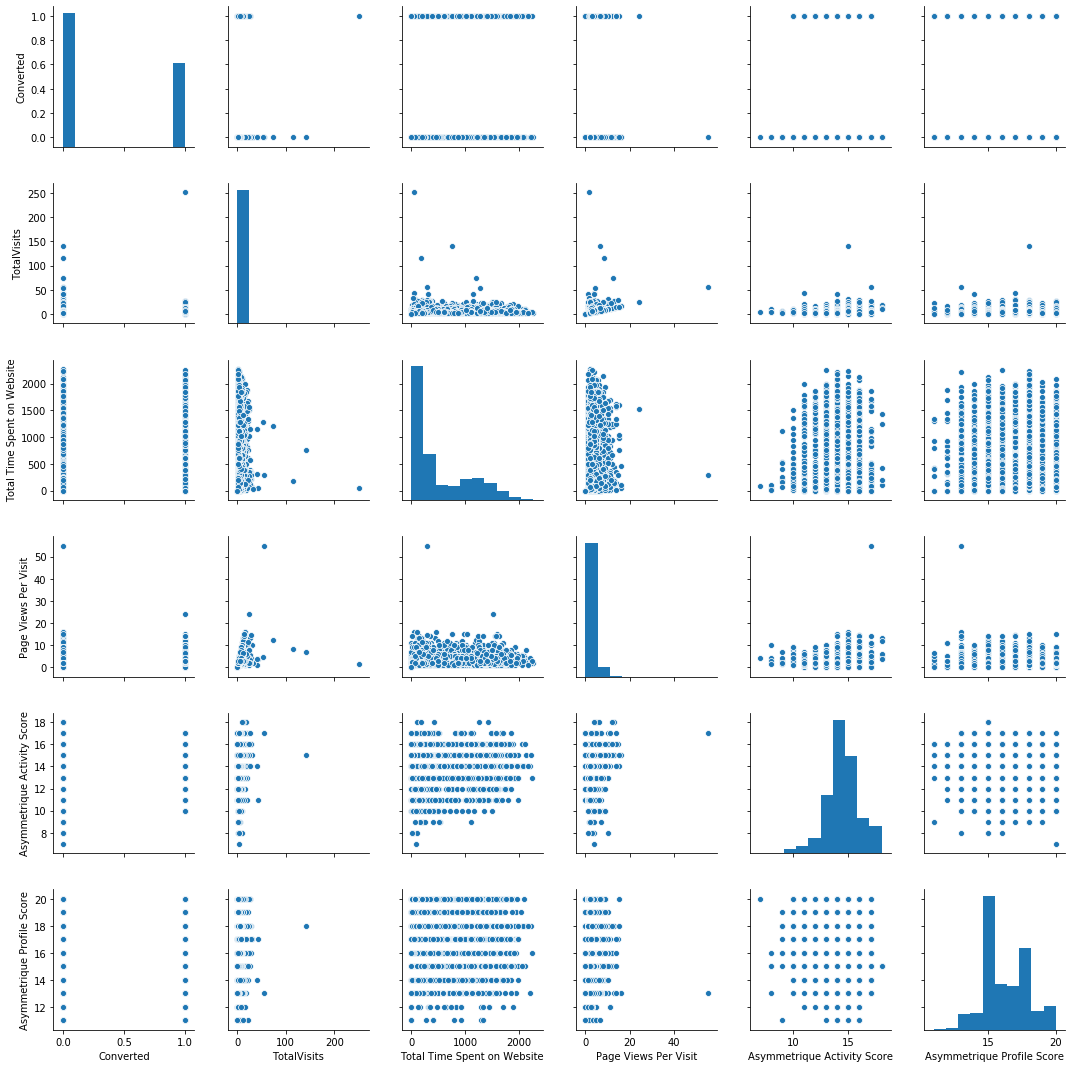

In [8]:
# Pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(leads_numeric)
plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [9]:
# Correlation matrix
cor = leads_numeric.corr()
cor

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
Converted,1.000000,0.030395,0.362483,-0.003328,0.167962,0.218571
TotalVisits,0.030395,1.000000,0.221240,0.512125,-0.058514,0.130887
Total Time Spent on Website,0.362483,0.221240,1.000000,0.320361,-0.065287,0.175589
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000,-0.162892,0.161254
Asymmetrique Activity Score,0.167962,-0.058514,-0.065287,-0.162892,1.000000,-0.123250
Asymmetrique Profile Score,0.218571,0.130887,0.175589,0.161254,-0.123250,1.000000


Let's plot the correlations on a heatmap for better visualisation

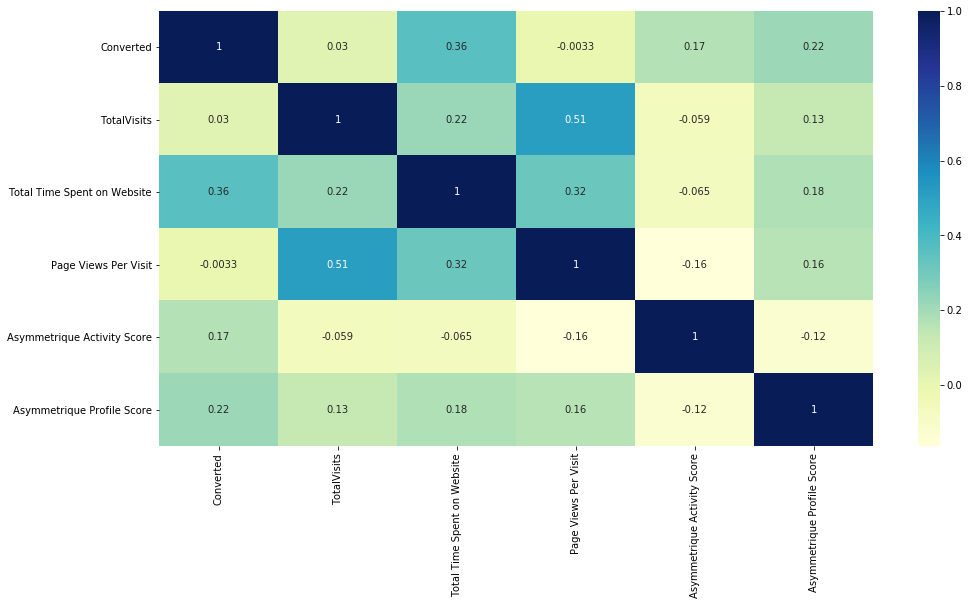

In [10]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### 2. Data Cleaning

Let's now conduct some data cleaning steps. 

In [11]:
leads_df = leads_df.replace("Select",np.nan)

In [12]:
# Check for missing values. we find there are no missing values in the dataset
[leads_df.isnull().sum()/len(leads_df)]

[Prospect ID                                      0.000000
 Lead Number                                      0.000000
 Lead Origin                                      0.000000
 Lead Source                                      0.003896
 Do Not Email                                     0.000000
 Do Not Call                                      0.000000
 Converted                                        0.000000
 TotalVisits                                      0.014827
 Total Time Spent on Website                      0.000000
 Page Views Per Visit                             0.014827
 Last Activity                                    0.011147
 Country                                          0.266342
 Specialization                                   0.365801
 How did you hear about X Education               0.784632
 What is your current occupation                  0.291126
 What matters most to you in choosing a course    0.293182
 Search                                           0.0000

`"Lead Number"` is not of any use in building the model. 
`"Country"` and `"City"` is not of also not of any use in building the model. 
Hence dropping the columns.

`"Lead Quality  ","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"` columns have more than 30% NA Values.
Hence dropping the columns.

`"Tags"` is given to customer manually. Hence dropping the column.

In [13]:
leads_df = leads_df.drop(['Lead Number','Country', 'City','Lead Quality','Tags','Asymmetrique Activity Index', 
                          'Asymmetrique Profile Index',
                          #'What is your current occupation',
                          'Asymmetrique Activity Score','Asymmetrique Profile Score',
                          'How did you hear about X Education',
                          'Lead Profile',
                         'Last Notable Activity'], axis=1)
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No


In [14]:
leads_df = leads_df.drop(['Magazine','Search','Newspaper Article','X Education Forums',
                          'Newspaper','Digital Advertisement'], axis=1)

In [15]:
# Fill the empty values with median values
leads_df= leads_df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [16]:
leads_df.shape

(9240, 19)

In [17]:
# Check for missing values. we find there are no missing values in the dataset
[leads_df.isnull().sum()/len(leads_df)]

[Prospect ID                                      0.0
 Lead Origin                                      0.0
 Lead Source                                      0.0
 Do Not Email                                     0.0
 Do Not Call                                      0.0
 Converted                                        0.0
 TotalVisits                                      0.0
 Total Time Spent on Website                      0.0
 Page Views Per Visit                             0.0
 Last Activity                                    0.0
 Specialization                                   0.0
 What is your current occupation                  0.0
 What matters most to you in choosing a course    0.0
 Through Recommendations                          0.0
 Receive More Updates About Our Courses           0.0
 Update me on Supply Chain Content                0.0
 Get updates on DM Content                        0.0
 I agree to pay the amount through cheque         0.0
 A free copy of Mastering Th

In [18]:
leads_df.shape

(9240, 19)

In [19]:
#### Converting some binary variables (Yes/No) to 0/1

# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call','Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

In [20]:
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0


In [21]:
leads_df = leads_df.drop(['Prospect ID'], axis=1)

Let's now create dummy variables for the categorical variables

In [22]:
# Subset all categorical variables
leads_df_categorical = leads_df.select_dtypes(include=['object'])
#leads_df_categorical = leads_df_categorical.drop(['Prospect ID'], axis=1)
leads_df_categorical.head()

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course
0,API,Olark Chat,Page Visited on Website,Finance Management,Unemployed,Better Career Prospects
1,API,Organic Search,Email Opened,Finance Management,Unemployed,Better Career Prospects
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Better Career Prospects
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Better Career Prospects
4,Landing Page Submission,Google,Converted to Lead,Finance Management,Unemployed,Better Career Prospects


In [23]:
# Convert into dummies
leads_dummies = pd.get_dummies(leads_df_categorical, drop_first=True)
leads_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [24]:
leads_dummies.shape

(9240, 64)

In [25]:
# Drop categorical variable columns
leads_df = leads_df.drop(list(leads_df_categorical.columns), axis=1)

In [26]:
# Concatenate dummy variables with X
leads_df = pd.concat([leads_df, leads_dummies], axis=1)

In [27]:
# Let's check the first few rows
leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### 3. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [28]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads_df.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [29]:
# Putting response variable to y
y = leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [30]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [31]:
y_train.head(10)

1871    0
6795    0
3516    0
8105    0
3934    0
4844    1
3297    0
8071    1
987     0
7423    1
Name: Converted, dtype: int64

### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables.The scaling has to be done only on the train dataset as we don't want it to learn anything from the test data.

In [32]:
leads_numeric.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

Let's scale all these columns using StandardScaler.

In [33]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']#, #'Asymmetrique Activity Score',
       #'Asymmetrique Profile Score']

# Scale these variables using 'fit_transform'
X_train[varlist] = scaler.fit_transform(X_train[varlist])

In [34]:
# Let's take a look at the train dataframe now
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
1871,0,0,-0.645678,-0.885371,-1.062143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6795,0,0,0.109111,0.005716,-0.452487,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3516,0,0,0.297808,-0.691418,0.083827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8105,0,0,0.297808,1.365219,1.229797,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3934,0,0,-0.645678,-0.885371,-1.062143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
### Checking the conversion Rate
conversion = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
conversion

38.53896103896104

#### Looking at Correlations

In [36]:
# Let's see the correlation matrix 
#plt.figure(figsize = (20,10))        # Size of the figure
#sns.heatmap(leads_df.corr(),annot = True)
#plt.show()

#### Model Building
Let's start by splitting our data into a training set and a test set.

In [37]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6397
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Mar 2020   Deviance:                          nan
Time:                        18:08:24   Pearson chi2:                 7.20e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -5.912e+14   5.67e+07  -1.04e+07      0.000   -5.91e+14   -5.91e+14
Do Not Email                                                            -2.502e+14   4.42e+06  -5.66e+07      0.000    -2.5e+14    -2.5e+14
Do Not Call                                                              8.174e+15   4.77e+07   1.71e+08      0.000    8.17e+15    8.17e+15
TotalVisits                                                              9.936e+13   9.83e+05   1.01e+08      0.000    9.94e+13    9.94e+13
Total Time Spent on Website                                              6.624e+14   9.45e+05   7.01e+08      0.000    6.62e+14    6.62e+14
Page Views Per Visit                                                     -6.35e+13    1.2e+06  -5.28e+07      0.000   -6.35e+13   -6.35e+13
Through Recommendations                                                 -5.327e+14   2.55e+07  -2.09e+07      0.000   -5.33e+14   -5.33e+14
Receive More Updates About Our Courses                                     75.3314   5.23e-07   1.44e+08      0.000      75.331      75.331
Update me on Supply Chain Content                                        -125.2068      8e-07  -1.57e+08      0.000    -125.207    -125.207
Get updates on DM Content                                                  45.4323   6.54e-07   6.95e+07      0.000      45.432      45.432
I agree to pay the amount through cheque                                 -179.7629   1.26e-06  -1.43e+08      0.000    -179.763    -179.763
A free copy of Mastering The Interview                                  -1.172e+14   2.62e+06  -4.47e+07      0.000   -1.17e+14   -1.17e+14
Lead Origin_Landing Page Submission                                     -9.268e+13   2.91e+06  -3.18e+07      0.000   -9.27e+13   -9.27e+13
Lead Origin_Lead Add Form                                                2.064e+15    1.3e+07   1.59e+08      0.000    2.06e+15    2.06e+15
Lead Origin_Lead Import                                                 -2.216e+15    4.8e+07  -4.62e+07      0.000   -2.22e+15   -2.22e+15
Lead Origin_Quick Add Form                                               5.238e+15   6.78e+07   7.73e+07      0.000    5.24e+15    5.24e+15
Lead Source_Direct Traffic                                               1.826e+15    4.1e+07   4.46e+07      0.000    1.83e+15    1.83e+15
Lead Source_Facebook                                                     3.905e+15    6.3e+07    6.2e+07      0.000     3.9e+15     3.9e+15
Lead Source_Google                                                       1.935e+15   4.09e+07   4.73e+07      0.000    1.93e+15    1.93e+15
Lea

In [38]:
#### Feature Selection Using RFE

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [40]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [41]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False])

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 7),
 ('TotalVisits', False, 41),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 43),
 ('Through Recommendations', False, 20),
 ('Receive More Updates About Our Courses', False, 62),
 ('Update me on Supply Chain Content', False, 61),
 ('Get updates on DM Content', False, 59),
 ('I agree to pay the amount through cheque', False, 60),
 ('A free copy of Mastering The Interview', False, 54),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Lead Origin_Quick Add Form', False, 26),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Live Chat', False, 31),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Pay per Click Ads', False, 44),
 ('Lead Source_Press_Release

In [43]:
col = X_train.columns[rfe.support_]

In [44]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email

##### Assessing the model with StatsModels

Let's now check the summary of this model using `statsmodels`.

In [45]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.9
Date:                Mon, 02 Mar 2020   Deviance:                       5489.8
Time:                        18:08:27   Pearson chi2:                 9.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3819      0.053    -25.835      0.000      -1.487      -1.277
Do Not Email                                            -1.1731      0.187     -6.275      0.000      -1.540      -0.807
Total Time Spent on Website                              1.0895      0.039     28.041      0.000       1.013       1.166
Lead Origin_Lead Add Form                                3.6214      0.189     19.182      0.000       3.251       3.991
Lead Source_Olark Chat                                   1.1493      0.101     11.389      0.000       0.952       1.347
Lead Source_Welingak Website                             1.9660      0.749      2.626      0.009       0.499       3.433
Last Activity_Converted to Lead                         -1.2360      0.218     -5.660      0.000      -1.664      -0.808
Last Activity_Email Bounced                             -0.9087      0.342     -2.654      0.008      -1.580      -0.238
Last Activity_Had a Phone Conversation                   2.2461      0.673      3.335      0.001       0.926       3.566
Last Activity_Olark Chat Conversation                   -1.3911      0.163     -8.534      0.000      -1.711      -1.072
Last Activity_SMS Sent                                   1.2006      0.073     16.394      0.000       1.057       1.344
Specialization_Hospitality Management                   -0.8462      0.317     -2.673      0.008      -1.467      -0.226
What is your current occupation_Housewife               22.9442   1.37e+04      0.002      0.999   -2.68e+04    2.69e+04
What is your current occupation_Working Professional     2.8445      0.187     15.221      0.000       2.478       3.211
========================================================================================================================
"""

In [46]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.231975
6795    0.201708
3516    0.271727
8105    0.786859
3934    0.231975
4844    0.990922
3297    0.101831
8071    0.999129
987     0.123708
7423    0.877604
dtype: float64

In [47]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23197515, 0.20170756, 0.27172662, 0.78685916, 0.23197515,
       0.99092224, 0.10183077, 0.99912923, 0.12370839, 0.87760404])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [48]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,converted,Conversion_Prob,ID
0,0,0.231975,1871
1,0,0.201708,6795
2,0,0.271727,3516
3,0,0.786859,8105
4,0,0.231975,3934


In [49]:
##### Creating new column 'Convert' with 1 if Conversion_Prob > 0.5 else 0

In [50]:
y_train_pred_final['Convert'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,converted,Conversion_Prob,ID,Convert
0,0,0.231975,1871,0
1,0,0.201708,6795,0
2,0,0.271727,3516,0
3,0,0.786859,8105,1
4,0,0.231975,3934,0
5,1,0.990922,4844,1
6,0,0.101831,3297,0
7,1,0.999129,8071,1
8,0,0.123708,987,0
9,1,0.877604,7423,1


In [51]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.Convert )
print(confusion)

[[3526  476]
 [ 735 1731]]


In [52]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.Convert))

0.8127705627705628


In [53]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [54]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7019464720194647

In [55]:
# Let us calculate specificity
TN / float(TN+FP)

0.8810594702648675

In [56]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11894052973513243


In [57]:
# positive predictive value 
print (TP / float(TP+FP))

0.784322609877662


In [58]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8275052804505985


#### Checking VIFs

In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.79
6,Last Activity_Email Bounced,1.76
3,Lead Source_Olark Chat,1.55
2,Lead Origin_Lead Add Form,1.42
8,Last Activity_Olark Chat Conversation,1.36
4,Lead Source_Welingak Website,1.24
1,Total Time Spent on Website,1.22
9,Last Activity_SMS Sent,1.21
12,What is your current occupation_Working Profes...,1.16
7,Last Activity_Had a Phone Conversation,1.01


### Step 5: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [61]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [62]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

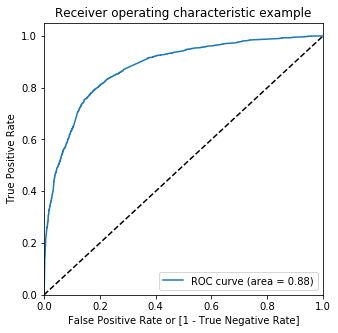

In [63]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.Conversion_Prob)

### Step 6: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [64]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,Conversion_Prob,ID,Convert,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.231975,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.201708,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.271727,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.786859,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.231975,3934,0,1,1,1,0,0,0,0,0,0,0


In [65]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.583952  0.970803  0.345577
0.2   0.2  0.727582  0.918897  0.609695
0.3   0.3  0.796691  0.830900  0.775612
0.4   0.4  0.813544  0.762774  0.844828
0.5   0.5  0.812771  0.701946  0.881059
0.6   0.6  0.792053  0.583131  0.920790
0.7   0.7  0.778757  0.507299  0.946027
0.8   0.8  0.746599  0.381995  0.971264
0.9   0.9  0.713358  0.267234  0.988256


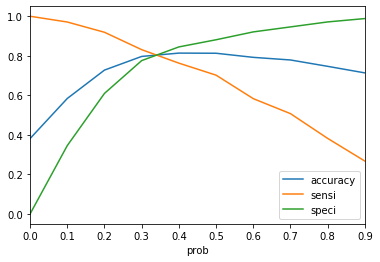

In [66]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [67]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,converted,Conversion_Prob,ID,Convert,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.231975,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.201708,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.271727,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.786859,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.231975,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [68]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8038033395176253

In [69]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[3198,  804],
       [ 465, 2001]], dtype=int64)

In [70]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [71]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8114355231143552

In [72]:
# Let us calculate specificity
TN / float(TN+FP)

0.7991004497751124

In [73]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20089955022488756


In [74]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7133689839572193


In [75]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8730548730548731


### Step 7: Making predictions on the test set

In [76]:
X_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])

In [77]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Hospitality Management,What is your current occupation_Housewife,What is your current occupation_Working Professional
4269,0,0.964504,0,0,0,0,0,0,0,1,0,0,0
2376,0,-0.885371,1,0,0,0,0,0,0,1,0,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,0,0,0,1
9199,0,-0.885371,0,1,0,0,0,0,1,0,0,0,0
4359,0,-0.885371,1,0,0,0,0,0,0,0,0,0,0


In [78]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [79]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.704645
2376    0.922402
7766    0.649217
9199    0.069894
4359    0.781575
9186    0.518519
1631    0.418953
8963    0.140368
8007    0.052316
5324    0.304289
dtype: float64

In [80]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
4269,0.704645
2376,0.922402
7766,0.649217
9199,0.069894
4359,0.781575


In [81]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [82]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [83]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [84]:
y_pred_final.head()

,Converted,ID,0
0,1,4269,0.704645
1,1,2376,0.922402
2,1,7766,0.649217
3,0,9199,0.069894
4,1,4359,0.781575


In [85]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [86]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','Converted','Conversion_Prob'], axis=1)

In [87]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ID,Converted,Conversion_Prob
0,4269,1,0.704645
1,2376,1,0.922402
2,7766,1,0.649217
3,9199,0,0.069894
4,4359,1,0.781575


In [88]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [89]:
y_pred_final.head()

,ID,Converted,Conversion_Prob,final_predicted
0,4269,1,0.704645,1
1,2376,1,0.922402,1
2,7766,1,0.649217,1
3,9199,0,0.069894,0
4,4359,1,0.781575,1


In [90]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8113275613275613

In [91]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1358,  319],
       [ 204,  891]], dtype=int64)

In [92]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8136986301369863

In [94]:
# Let us calculate specificity
TN / float(TN+FP)

0.8097793679189028

In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7363636363636363


In [96]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19022063208109719


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8693982074263764
